In [5]:
#Data colllection & Preprocessing

import yfinance as yf

# Download historical data for AAPL from 2010-10-01 to 2024-01-01
df = yf.download('AAPL', start='2010-10-01', end='2024-01-01')

# Save to CSV in a different location (Desktop)
df.to_csv("C:/Users/Hp/Desktop/AAPL.csv")

# Print first five rows
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-10-01  8.502044  8.624223  8.466834  8.611283  448142800
2010-10-04  8.385281  8.513478  8.359098  8.474357  435302000
2010-10-05  8.695246  8.710593  8.480978  8.486396  501967200
2010-10-06  8.702769  8.787032  8.584502  8.714807  670868800
2010-10-07  8.703673  8.741591  8.634158  8.737378  408399600


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


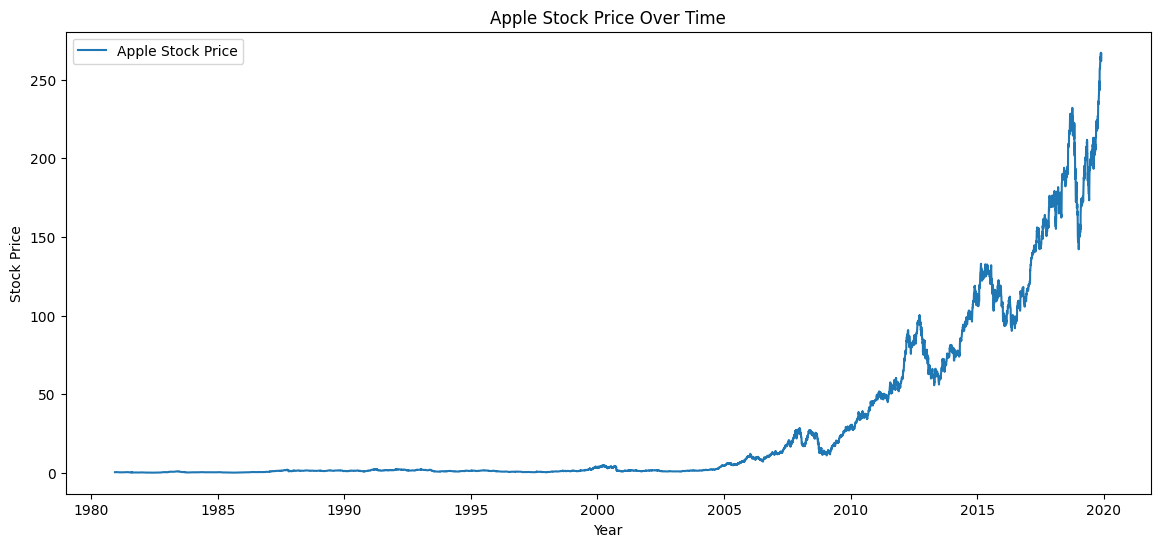

,Open,High,Low,Close,Adj Close,Volume,Close_Scaled
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,0.001188
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,0.001087
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,0.000953
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,0.000995
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,0.001045


In [6]:
#Data preprocessing &EDA (Exploratory Data Analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv(r"C:\Users\Hp\Downloads\AAPL.csv", index_col='Date', parse_dates=True)

# Ensure column names are correctly referenced
print(df.columns)  # Check available columns

# Close data visualization
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Apple Stock Price')  # Ensure 'Close' is correct
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Apple Stock Price Over Time')
plt.legend()
plt.show()

# Normalization (MinMax Scaling)
scaler = MinMaxScaler(feature_range=(0,1))
df['Close_Scaled'] = scaler.fit_transform(df[['Close']])  # Use a new column to avoid overwriting

df.head()



In [7]:
#Data Preprocessing for lstm

# Function to create sequences for LSTM
def create_sequences(data, time_step=60):
    x, y = [], []
    for i in range(len(data) - time_step - 1):
        x.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)  # Return after the loop

# Ensure the column name is correct
data = df['Close'].values.reshape(-1, 1)  # Use 'Close' instead of 'close'

# Create sequences
x, y = create_sequences(data)

# Reshape for LSTM (3D shape: samples, time_steps, features)
x = x.reshape(x.shape[0], x.shape[1], 1)

# Print shapes to verify
print(f"x shape: {x.shape}")  # Expected: (num_samples, time_step, 1)
print(f"y shape: {y.shape}")  # Expected: (num_samples,)


x shape: (9762, 60, 1)
y shape: (9762,)


In [8]:
#Build LSTM model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Example data (make sure your real data is shaped properly)
# Let's say you have x: (samples, timesteps, features)
x = np.random.rand(1000, 10, 1)
y = np.random.rand(1000, 1)

# Split data (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False
)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.3457 - val_loss: 0.0850
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1005 - val_loss: 0.0835
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0943 - val_loss: 0.0821
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0878 - val_loss: 0.0826
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0897 - val_loss: 0.0819
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0846 - val_loss: 0.0828
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0820 - val_loss: 0.0817
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0916 - val_loss: 0.0818
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0848 - val_loss: 0.0818
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0879 - val_loss: 0.0818
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0866 - val_loss: 0.0828
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


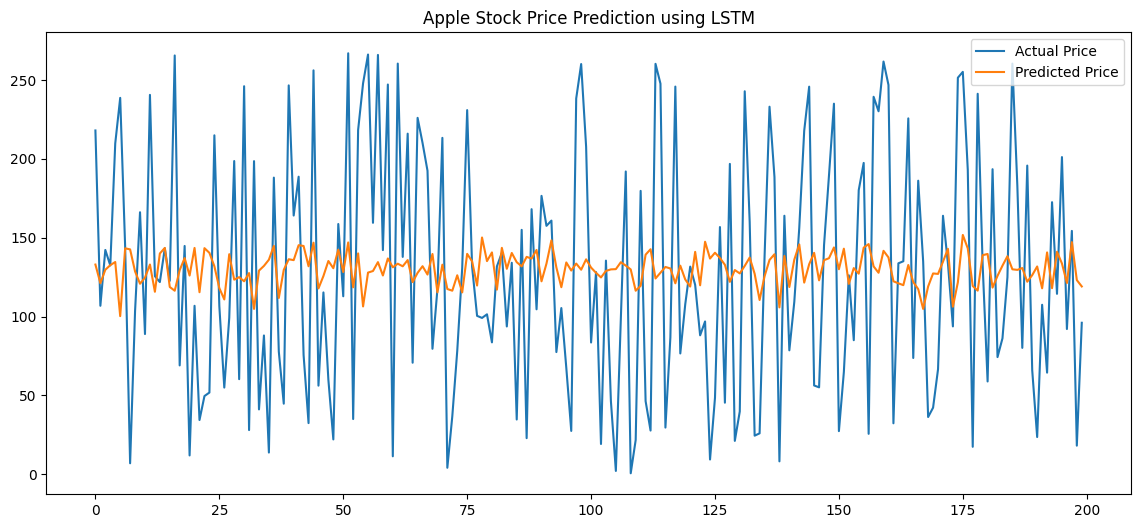

In [13]:
# Model Evaluation and prediction
prediction = model.predict(X_test)

# De-normalization
prediction = scaler.inverse_transform(prediction.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted prices
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(prediction, label="Predicted Price")  # Fixed variable name
plt.legend()
plt.title("Apple Stock Price Prediction using LSTM")
plt.show()
